<a href="https://colab.research.google.com/github/rsthakur8815/CV-Assignment/blob/main/Copy_of_Assignment_1_RamdevLodhi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from google.colab.patches import cv2_imshow

In [ ]:
#Defining function to calculate average intensity for grayscale image
#Using Luminance Function
def BGR_to_GrayScale_using_Luminance(image):
    # Gray=0.299×Red+0.587×Green+0.114×Blue   Luminance formula
    gray_image = image.astype(float)
    gray_image = gray_image[:,:,0]*0.299+gray_image[:,:,0]*0.587+gray_image[:,:,0]*0.114
    gray_image.astype(np.uint8)

    #Normalizing the values using min max algorithm
    i_min = np.min(gray_image)
    i_max = np.max(gray_image)
    if(i_max - i_min != 0):
      gray_image = (gray_image - i_min)/(i_max - i_min)

    return gray_image

#Using Averaging Method
def BGR_to_GrayScale_using_averaging(image):
    gray_image = image.astype(float)
    gray_image = (gray_image[:,:,0]+gray_image[:,:,0]+gray_image[:,:,0])/3
    gray_image.astype(np.uint8)

    # #Normalizing the values using min max algorithm
    i_min = np.min(gray_image)
    i_max = np.max(gray_image)
    if(i_max - i_min != 0):
      gray_image = (gray_image - i_min)/(i_max - i_min)

    return gray_image

In [ ]:
#Defining min-max normalization
def min_max_normalization(image):
    i_min = np.min(image)
    i_max = np.max(image)
    if(i_max - i_min != 0):
      image = (image - i_min)/(i_max - i_min)
    return image

In [ ]:
def threshold_pixel(image,center,i,j):
  value_assigned =0;
  try:
    if image[i][j]>= center:
      value_assigned = 1
  except:
    pass

  return value_assigned

def lbp_calculator(image,i,j):
    center = image[i][j]
    # print(center)
    val_sequence =[]
    power_value=[128,64,32,16,8,4,2,1]
    #top-left
    val_sequence.append(threshold_pixel(image,center,i-1,j-1))

    #top
    val_sequence.append(threshold_pixel(image,center,i-1,j))

    #top-right
    val_sequence.append(threshold_pixel(image,center,i-1,j+1))

    #right
    val_sequence.append(threshold_pixel(image,center,i,j+1))

    #bottom-right
    val_sequence.append(threshold_pixel(image,center,i+1,j+1))

    #bottom
    val_sequence.append(threshold_pixel(image,center,i+1,j))

    #bottom-left
    val_sequence.append(threshold_pixel(image,center,i+1,j-1))

    #left
    val_sequence.append(threshold_pixel(image,center,i,j-1))

    val = 0

    for index in range(len(val_sequence)):
      # print(f"{power_value[index]}X{val_sequence[index]}={power_value[index]*val_sequence[index]}")
      val+=power_value[index]*val_sequence[index]

    return val

In [ ]:
def traverse_image(image):
  height,width = image.shape[:2]

  for i in range(height):
    for j in range(width):
      image[i][j] = lbp_calculator(image,i,j)

  return min_max_normalization(image)

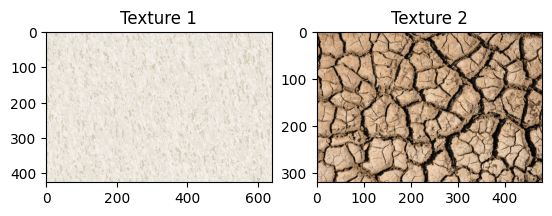

In [ ]:
url = "/content/drive/MyDrive/Images /texture_1.jpg"
url1 ="/content/drive/MyDrive/Images /texture_2.jpg"
# url = input("Enter the path to image")

#Reading images using io class's imread function
texture_1 = io.imread(url)
texture_2 = io.imread(url1)

#Converting images to np array
texture_1 = np.array(texture_1)
texture_2 = np.array(texture_2)

#showing Images
plt.subplot(1, 2, 1)
plt.imshow(texture_1)
plt.title('Texture 1')

plt.subplot(1, 2, 2)
plt.imshow(texture_2)
plt.title('Texture 2')

plt.show()

In [ ]:
print("The shape of texture_1 is ",texture_1.shape)
print("The type of texture_1 is ",type(texture_1.dtype))

print("The shape of texture_2 is ",texture_2.shape)
print("The type of texture_2 is ",type(texture_2.dtype))

The shape of texture_1 is  (426, 639, 3)
The type of texture_1 is  <class 'numpy.dtype[uint8]'>
The shape of texture_2 is  (320, 480, 3)
The type of texture_2 is  <class 'numpy.dtype[uint8]'>


In [ ]:
(height_1,width_1,channel_1) = texture_1.shape[:3]
(height_2,width_2,channel_2) = texture_2.shape[:3]


In [ ]:
print(f"The height of texture_1 is {height_1}")
print(f"The width of texture_1 is {width_1}")
print(f"The channels of texture_1 is {channel_1}")
print()
print(f"The height of texture_2 is {height_2}")
print(f"The width of texture_2 is {width_2}")
print(f"The channels of texture_2 is {channel_2}")

The height of texture_1 is 426
The width of texture_1 is 639
The channels of texture_1 is 3

The height of texture_2 is 320
The width of texture_2 is 480
The channels of texture_2 is 3


In [ ]:
gray_texture_1 = BGR_to_GrayScale_using_Luminance(texture_1)
gray_texture_2 = BGR_to_GrayScale_using_averaging(texture_2)

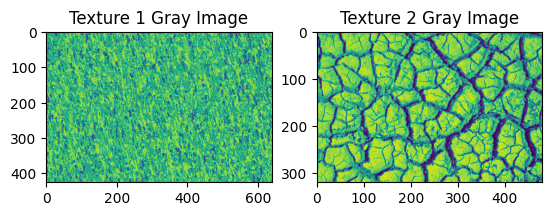

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(gray_texture_1)
plt.title('Texture 1 Gray Image')

plt.subplot(1, 2, 2)
plt.imshow(gray_texture_2)
plt.title('Texture 2 Gray Image')

plt.show()



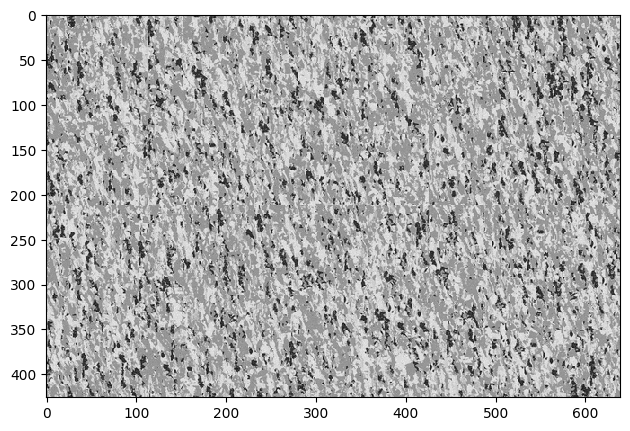

In [ ]:
io.imshow(gray_texture_1)

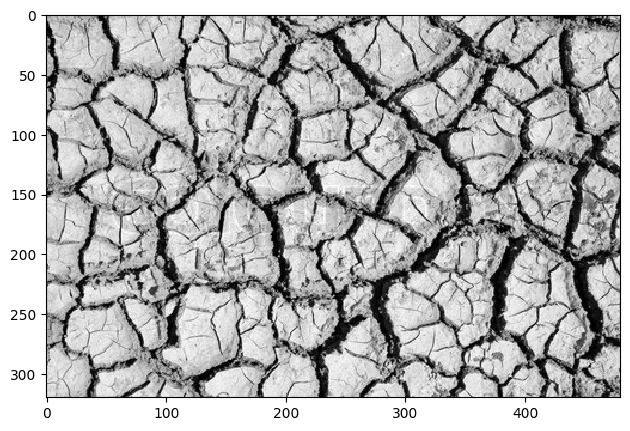

In [ ]:
io.imshow(gray_texture_2)

In [ ]:
# # for i in range(height):
# #   for j in range(width):
# #     print(f"{i} {j}")

# img1 = np.array([[5,9,1 ],[4,4,6],[7,2,3]])
# print(img1)
# print(lbp_calculator(img1,1,1))


In [ ]:
texture_1_lbp = traverse_image(gray_texture_1)
texture_2_lbp = traverse_image(gray_texture_2)

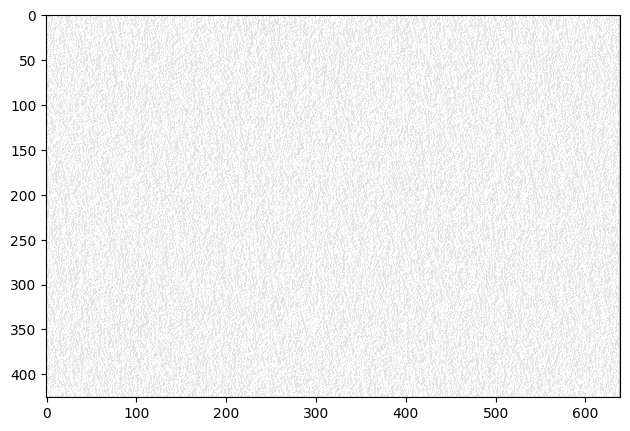

In [ ]:
io.imshow(texture_1_lbp)

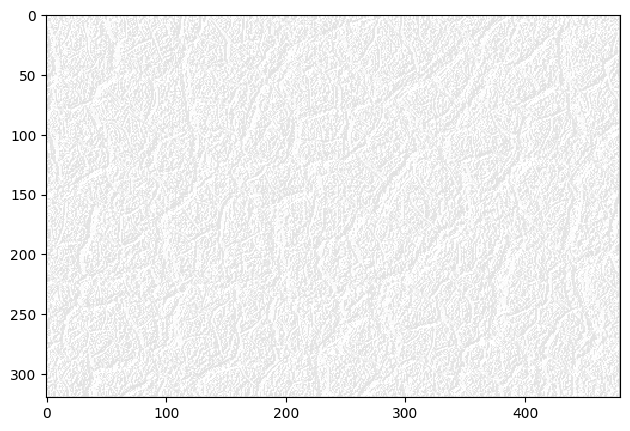

In [ ]:
io.imshow(texture_2_lbp)